In [2]:
import pandas as pd

# Load the IMDB dataset
# Replace the file path with your actual file path
file_path = '/content/IMDB Dataset.csv'
# Try loading the dataset and skip bad lines
df = pd.read_csv(file_path, on_bad_lines='skip')

# Display the first few rows to understand its structure
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Check for missing values in the dataset
df.isnull().sum()

# Check basic statistics of the dataset
df.describe()


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode the sentiment labels
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Display the encoded labels
df.head()


,review,sentiment,sentiment_encoded
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variables
X = df['review']
y = df['sentiment_encoded']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the split size
len(X_train), len(X_test)


(40000, 10000)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data, transform the test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shape of the transformed data
X_train_tfidf.shape, X_test_tfidf.shape


((40000, 5000), (10000, 5000))

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_tfidf)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.895
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.90      0.89     10000



In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_tfidf, y_train)

# Display the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

# Evaluate the tuned model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.886424905485394
Accuracy: 0.8958
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



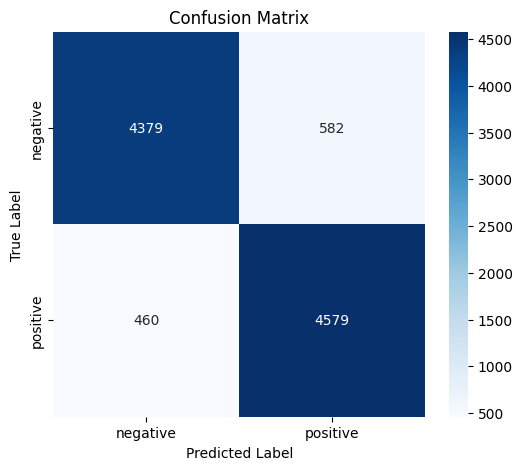

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
y_pred = best_model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [13]:
# Example: Adding a hypothetical 'gender' column for demonstration
# Assuming you have a 'gender' column (e.g., 'male', 'female', etc.)
df['gender'] = ['male' if i % 2 == 0 else 'female' for i in range(len(df))]  # Sample demo column, replace with your actual column

# Split the dataset by the 'gender' column
male_reviews = df[df['gender'] == 'male']
female_reviews = df[df['gender'] == 'female']

# Print the size of each split
print(f"Number of male reviews: {len(male_reviews)}")
print(f"Number of female reviews: {len(female_reviews)}")


Number of male reviews: 25000
Number of female reviews: 25000


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Define a function to train and evaluate a model for each group
def train_and_evaluate_model(df, demographic):
    # Extract reviews and sentiment labels
    X = df['review']
    y = df['sentiment_encoded']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert text reviews into numerical vectors using TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Train a Logistic Regression model
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_tfidf, y_train)

    # Predict the sentiment on the test set
    y_pred = model.predict(X_test_tfidf)

    # Calculate accuracy and print classification report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {demographic} reviews: {accuracy:.4f}")
    print(f"Classification Report for {demographic} reviews:\n{classification_report(y_test, y_pred)}")

# Train and evaluate models for male and female reviews
train_and_evaluate_model(male_reviews, 'Male')
train_and_evaluate_model(female_reviews, 'Female')


Accuracy for Male reviews: 0.8854
Classification Report for Male reviews:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2475
           1       0.88      0.90      0.89      2525

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000

Accuracy for Female reviews: 0.8888
Classification Report for Female reviews:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      2489
           1       0.88      0.90      0.89      2511

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



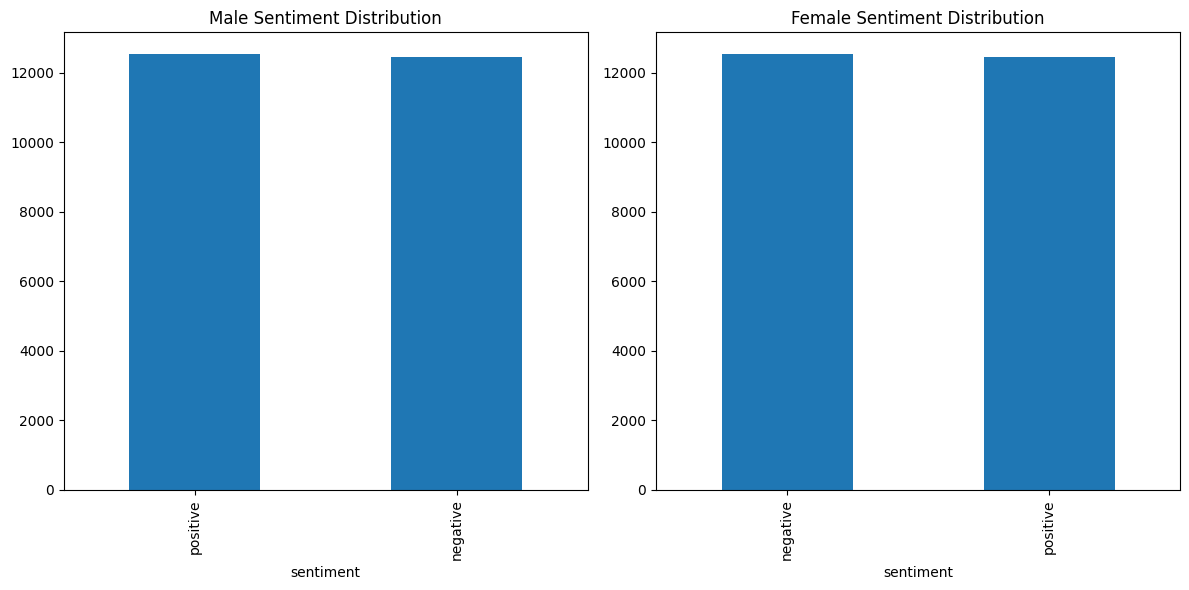

In [15]:
import matplotlib.pyplot as plt

# Plot sentiment distribution for male and female reviews
male_sentiment_counts = male_reviews['sentiment'].value_counts()
female_sentiment_counts = female_reviews['sentiment'].value_counts()

# Plot the bar charts
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

male_sentiment_counts.plot(kind='bar', ax=ax[0], title='Male Sentiment Distribution')
female_sentiment_counts.plot(kind='bar', ax=ax[1], title='Female Sentiment Distribution')

plt.tight_layout()
plt.show()


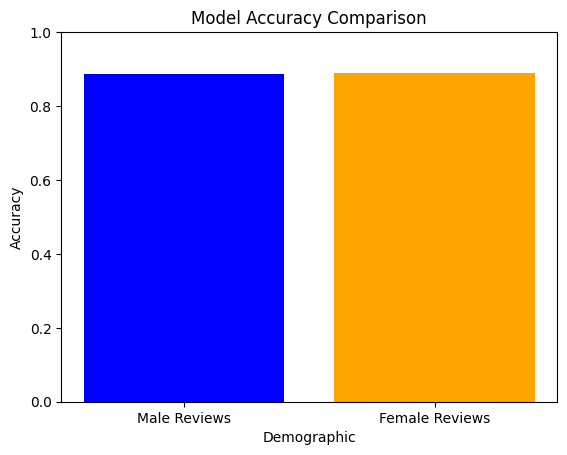

In [19]:
# Plotting the accuracy comparison
accuracies = [0.8854, 0.8888]
labels = ['Male Reviews', 'Female Reviews']

plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Demographic')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
